# Part I - Ford GoBike System Data Exploration 
## by Philip Obiorah

## Introduction
> Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from datetime import datetime as dt
%matplotlib inline

In [2]:
#load the dataset into a pandas dataframe
ford_go_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_go_bike.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
12847,415,2019-02-27 17:12:36.9520,2019-02-27 17:19:32.8970,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,22.0,Howard St at Beale St,37.789756,-122.394643,1566,Subscriber,1987.0,Female,No
181506,867,2019-02-01 09:01:34.1620,2019-02-01 09:16:01.8750,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,1298,Subscriber,1974.0,Male,No
90577,783,2019-02-16 12:04:13.0790,2019-02-16 12:17:16.2600,370.0,Jones St at Post St,37.787327,-122.413278,79.0,7th St at Brannan St,37.773492,-122.403672,5246,Subscriber,1997.0,Female,No
55846,463,2019-02-21 09:32:56.0270,2019-02-21 09:40:39.3280,60.0,8th St at Ringold St,37.774520,-122.409449,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3263,Subscriber,1989.0,Male,No
94733,890,2019-02-15 15:48:17.0750,2019-02-15 16:03:08.0570,36.0,Folsom St at 3rd St,37.783830,-122.398870,84.0,Duboce Park,37.769200,-122.433812,6522,Subscriber,1981.0,Female,No
95428,972,2019-02-15 13:39:34.9770,2019-02-15 13:55:47.0640,160.0,West Oakland BART Station,37.805318,-122.294837,155.0,Emeryville Public Market,37.840521,-122.293528,5089,Subscriber,1978.0,Male,No
62167,799,2019-02-20 17:04:06.0900,2019-02-20 17:17:25.2810,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,189.0,Genoa St at 55th St,37.839649,-122.271756,5251,Subscriber,1989.0,Male,No
129421,1164,2019-02-10 10:15:28.6390,2019-02-10 10:34:53.2290,76.0,McCoppin St at Valencia St,37.771662,-122.422423,10.0,Washington St at Kearny St,37.795393,-122.404770,5039,Subscriber,1991.0,Male,No
22742,690,2019-02-26 06:54:34.4100,2019-02-26 07:06:04.4960,101.0,15th St at Potrero Ave,37.767079,-122.407359,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,6311,Subscriber,1993.0,Male,No
173242,294,2019-02-03 12:42:02.0430,2019-02-03 12:46:56.7190,27.0,Beale St at Harrison St,37.788059,-122.391865,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4557,Subscriber,1989.0,Male,No


#### Issues
* Incorrect datatype for start_time, end_time, member_birth, start_station_id,  end_station_id, member_birth_year 
* Missing values in member_gender, member_birth_year, end_station_id, start_station_name, start_station_id and end_station_name
* No special column for age, day, and month
* Lattitude and longitude are great features but we cannot immediately get insight for them without performing some calculations of the distance covered. 



In [3]:
ford_go_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
#change  start_time , end_time and member_birth_year datatypes to datetime
ford_go_bike['start_time'] = pd.to_datetime(ford_go_bike['start_time'])
ford_go_bike['end_time'] = pd.to_datetime(ford_go_bike['end_time'])
ford_go_bike['member_birth_year'] = pd.to_datetime(ford_go_bike['member_birth_year'])


In [5]:
#test change  start_time , end_time and member_birth_year datatypes to datetime
ford_go_bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year          datetime64[ns]
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [6]:
# Let examine duration sec to find out if any duration is more than 24 hrs (86400)
ford_go_bike['duration_sec'].max()

85444

Maximum duration is 85444 , so it is safe to assume that all rides occured in one day. With that asssumption we shall exact the day and month for each ride. Given the dataset we also assume that all rides occurs in the same year 2019. 

In [7]:
ford_go_bike['day'] = ford_go_bike['start_time'].dt.day_name()
ford_go_bike['month'] = ford_go_bike['start_time'].dt.month_name()

  


In [8]:
# Converting float to int
ford_go_bike.member_birth_year = ford_go_bike.member_birth_year.astype(np.int)


/tmp/ipykernel_16761/1718661354.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ford_go_bike.member_birth_year = ford_go_bike.member_birth_year.astype(np.int)


In [9]:
#Let define a function to allow us extract age form member_birth_year
def get_age(dob):
    today = dt.now().year
    return today - dob

In [10]:
# We use the get_age function that returns age to create a new column `member_age` which would hold member ages. 
ford_go_bike["member_age"] = get_age(ford_go_bike["member_birth_year"])

In [11]:
#Let us examine the memeber_age column
ford_go_bike["member_age"].describe()

count    1.834120e+05
mean    -4.156280e+17
std      1.913313e+18
min     -9.223372e+18
25%      2.900000e+01
50%      3.400000e+01
75%      4.100000e+01
max      1.440000e+02
Name: member_age, dtype: float64

In [12]:
ford_go_bike[ford_go_bike["member_age"] > 70].count()

duration_sec               1032
start_time                 1032
end_time                   1032
start_station_id           1032
start_station_name         1032
start_station_latitude     1032
start_station_longitude    1032
end_station_id             1032
end_station_name           1032
end_station_latitude       1032
end_station_longitude      1032
bike_id                    1032
user_type                  1032
member_birth_year          1032
member_gender              1032
bike_share_for_all_trip    1032
day                        1032
month                      1032
member_age                 1032
dtype: int64

In [13]:
# Lets look at the 99% of bike riders age
ford_go_bike.member_age.describe(percentiles=[.99])


count    1.834120e+05
mean    -4.156280e+17
std      1.913313e+18
min     -9.223372e+18
50%      3.400000e+01
99%      6.600000e+01
max      1.440000e+02
Name: member_age, dtype: float64

* It seems their is an outlier in the `member_age`. The maximun age is 144 which appears to be abnormal, and over 99% for all age are belove 70.

* With the above in view it would be safe to limit our analyis to ages below 70. 

In [14]:
#select only records with member_age <= 70
ford_go_bike = ford_go_bike.query("member_age <= 70")

In [15]:
#test member_age values are less than 70
ford_go_bike.member_age.describe()

count    1.823800e+05
mean    -4.179799e+17
std      1.918462e+18
min     -9.223372e+18
25%      2.900000e+01
50%      3.400000e+01
75%      4.100000e+01
max      7.000000e+01
Name: member_age, dtype: float64

#### Calcluate distance covered form Lattitude and longitude 
Reference: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

In [16]:
# We would use # Will be using the math radians, sin, cos, sqrt and atan2
from math import radians, sin, cos, sqrt, atan2
# A function that would accept longitude stat and lat stat and long. end and lat. end
# to return the total distance between two points. 
def distance(start, end):
    
    lat1, long1 = start
    lat2, long2 = end
    radius = 6371 # Approximate raidius of the earth

    dlat = radians(lat2 - lat1)
    dlong = radians(long2 - long1)
    
    a = (sin(dlat / 2) * sin(dlat / 2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlong / 2) * sin(dlong / 2))
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c

    # Round up the values to two decimal places
    return round(distance, 2)

In [17]:
ford_go_bike['distance_km'] = ford_go_bike.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), 
                                                            (x['end_station_latitude'], x['end_station_longitude'])), 
                                         axis=1)

In [18]:
ford_go_bike.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,month,member_age,distance_km
6984,711,2019-02-28 09:24:34.441,2019-02-28 09:36:25.728,22.0,Howard St at Beale St,37.789756,-122.394643,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,1142,Subscriber,1979,Female,No,Thursday,February,43,0.64
82017,638,2019-02-18 11:37:38.673,2019-02-18 11:48:17.377,243.0,Bancroft Way at College Ave,37.869360,-122.254337,171.0,Rockridge BART Station,37.844279,-122.251900,4565,Subscriber,-9223372036854775808,NaN,No,Monday,February,-9223372036854773786,2.80
102281,1285,2019-02-14 16:28:52.287,2019-02-14 16:50:17.537,16.0,Steuart St at Market St,37.794130,-122.394430,87.0,Folsom St at 13th St,37.769757,-122.415674,5331,Subscriber,1980,Male,No,Thursday,February,42,3.29
119454,960,2019-02-11 17:42:49.634,2019-02-11 17:58:49.795,58.0,Market St at 10th St,37.776619,-122.417385,126.0,Esprit Park,37.761634,-122.390648,3356,Subscriber,1988,Female,No,Monday,February,34,2.88
57360,338,2019-02-21 08:23:34.038,2019-02-21 08:29:12.072,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,350.0,8th St at Brannan St,37.771431,-122.405787,6094,Subscriber,1990,Male,No,Thursday,February,32,1.21


In [19]:
#Let check for null values
ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182380 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             182380 non-null  int64         
 1   start_time               182380 non-null  datetime64[ns]
 2   end_time                 182380 non-null  datetime64[ns]
 3   start_station_id         182183 non-null  float64       
 4   start_station_name       182183 non-null  object        
 5   start_station_latitude   182380 non-null  float64       
 6   start_station_longitude  182380 non-null  float64       
 7   end_station_id           182183 non-null  float64       
 8   end_station_name         182183 non-null  object        
 9   end_station_latitude     182380 non-null  float64       
 10  end_station_longitude    182380 non-null  float64       
 11  bike_id                  182380 non-null  int64         
 12  user_type       

In [20]:
# Let check unique values in the member_gender
ford_go_bike['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [21]:
# Lets confirm unique values in the day
ford_go_bike['day'].unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

In [22]:
ford_go_bike.dropna(inplace=True)

In [23]:
# Lets confim that there are no empty "NaN" and other "None cells"
ford_go_bike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
day                        0
month                      0
member_age                 0
distance_km                0
dtype: int64

In [24]:
# Let check for outliers in the duration_sec column 
ford_go_bike.duration_sec.describe([.99])

count    173920.000000
mean        704.223149
std        1645.440119
min          61.000000
50%         511.000000
99%        3176.000000
max       84548.000000
Name: duration_sec, dtype: float64

There seem to be outliers in the duration_sec column. 99% for the duration_sec fall under 3176 seconds. There is pretty awkward jump to 84548 as the maximum value suggests. 

In [25]:
# Limiting duration in seconds to only  3200 seconds
ford_go_bike = ford_go_bike.query("duration_sec <= 3200")

In [26]:
#Test that duration in seconds is limited to only  3200 seconds
ford_go_bike.duration_sec.describe(percentiles=[.99])

count    172207.000000
mean        613.170580
std         426.521236
min          61.000000
50%         507.000000
99%        2280.000000
max        3200.000000
Name: duration_sec, dtype: float64

### Saving

In [27]:
ford_go_bike.to_csv('fordbike_clean.csv', index = False)
fordbike_clean = pd.read_csv('fordbike_clean.csv');
fordbike_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,month,member_age,distance_km
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thursday,February,48,2.41
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thursday,February,63,3.33
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,Thursday,February,39,2.03


In [28]:
# high- leve overview of data shape and compositon
print(fordbike_clean.shape)
print(fordbike_clean.dtypes)
print(fordbike_clean.head(10))

(172207, 20)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year            int64
member_gender               object
bike_share_for_all_trip     object
day                         object
month                       object
member_age                   int64
distance_km                float64
dtype: object
   duration_sec               start_time                 end_time  \
0          1585  2019-02-28 23:54:18.549  2019-03-01 00:20:44.074   
1          1793  2019-02-28 23:49:58.632  2019-03-01 00:19:51.760   
2          1147  2019-02-28 23:55:35.104  2019-03-01 00:14:42.588 

### What is the structure of your dataset?

> After prelimiary wrangling and feature engineering we  are now left with (172207 bike rides that occurred in the year 2019 with 20 features(duration_sec,	start_time,	end_time,	start_station_id, start_station_name,	start_station_latitude,	start_station_longitude,	end_station_id,	end_station_name,	end_station_latitude,	end_station_longitude,	bike_id,	user_type,	member_birth_year,	member_gender,	bike_share_for_all_trip, day, month, member_age, distance_km). 5 ints (duration_sec, member_age, member_birth_year , and bike_id )           
7 floats(distance_km, start_station_id,start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude                   
9 string objects ( user_type, end_station_name, start_time,end_time, start_station_name, member_gender, bike_share_for_all_trip, day, month       
        

The feature engineered columns:

* day
* month
* member_age
* distance_km

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in determining which features are most effective at predicting the duration of trips in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that day, month,  member_age, distance_km would affect ride duration_sec.

## Univariate Exploration

> We will begin by examining the distribution of the main variable of interest: duration sec


### In what duration(sec/mins) do we have the most number of trips ?

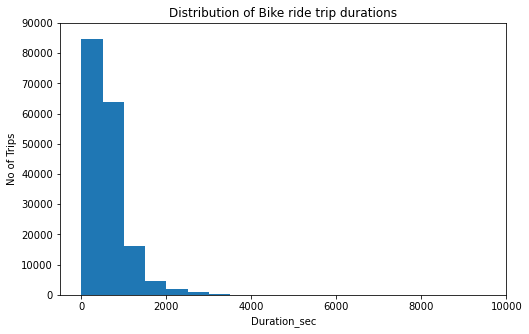

In [29]:
# lets start with a standard-scaled plot
binsize = 500
bins = np.arange(0, ford_go_bike['duration_sec'].max()+binsize, binsize )
plt.figure(figsize=[8, 5])
plt.hist(data = ford_go_bike, x = 'duration_sec', bins=bins);
plt.title('Distribution of Bike ride trip durations')
plt.xlabel('Duration_sec')
plt.ylabel('No of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

/tmp/ipykernel_16761/1134385293.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000])


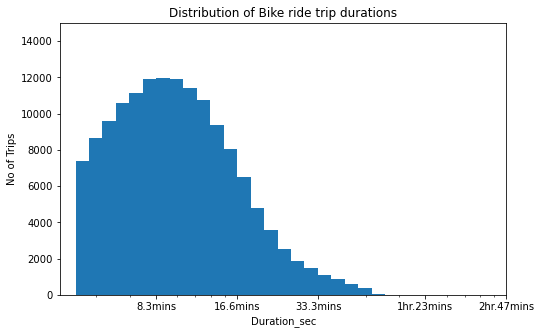

In [30]:
# There is a long tail in hte distribution , so let us put it on a log scale
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(ford_go_bike['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_go_bike, x = 'duration_sec', bins = bins)
plt.title('Distribution of Bike ride trip durations')
plt.xlabel('Duration_sec')
plt.ylabel('No of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,  5e3, 1e4], ['8.3mins', '16.6mins', '33.3mins', '1hr.23mins', '2hr.47mins'])
plt.axis([0, 10000, 0, 15000])
plt.show()



> Initially `duration_sec` had a long-tailed distribution with very few rides at the high end duration. When plotted on a log-scale, most trip duration occured in less than 33mins 20 secs (2000 seconds ). The highest record of trips occured in 10mins (600 secs). The number of trips initially increases from around 8000 values at 0 to 12000 values at around 600 seconds, but then begins to fall, reaching below 2000 values in less than 33 minutes.

### What day of the week have the most bike rides ?

>  Let us visualize `day` a categorical variable using Bar plt

In [31]:
#Let define a function that would be used regulaly to label our visualizations
def label_visual(x_label, y_label, title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

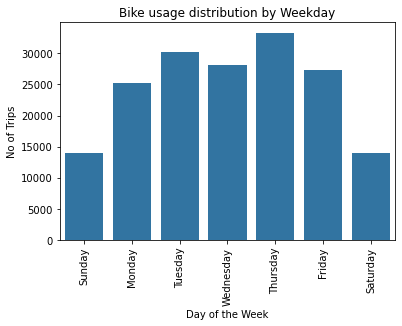

In [32]:
# bar plot of `day` categorical variable

#let order the chat base on weekdays
weekdays = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# plotting with one base color
base_color = sb.color_palette()[0]

sb.countplot(data = fordbike_clean, x = 'day', order=weekdays, color=base_color);
label_visual("Day of the Week", "No of Trips", "Bike usage distribution by Weekday")

plt.xticks(rotation=90);


 Thursdays had the highest usage, followed by Tuesdays and Fridays. Saturdays and Sundays saw a significant decrease in usage. This suggests that bikes are mostly used during the week and/or that people prefer to stay at home on weekends, resulting in less use of bikes.

###  What is the age distribution of the of the bike riders ?

Histogram of the discrete variable `age`

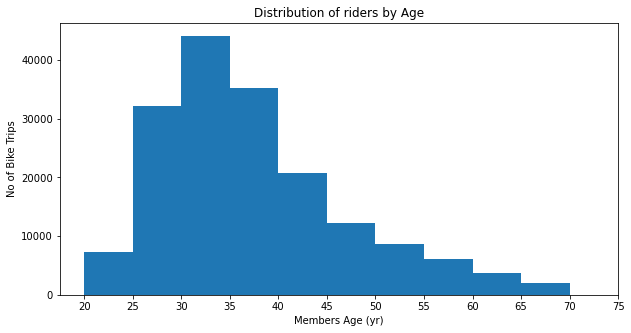

In [33]:
plt.figure(figsize = [10,5])
bin_age = np.arange(20, fordbike_clean.member_age.max()+5, 5)
ticks = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
labels = ['{}'. format(i) for i in ticks]
plt.hist(data = fordbike_clean, x= 'member_age', bins= bin_age);
plt.xticks(ticks, labels);
label_visual('Members Age (yr)', 'No of Bike Trips', 'Distribution of riders by Age')

The histogram shows that most bike riders fall between the ages of 25 to 40 year. Individual between 30-35 have the heighest number of rides. 

### What is the distribution of users type ?

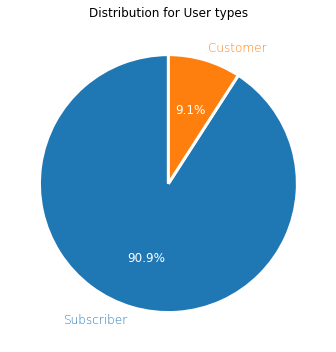

In [34]:
# Pie plot distribution of the user type (nominal categorical variable)


fig, ax = plt.subplots(figsize=(10, 5))

user_count = fordbike_clean.user_type.value_counts()

patches, texts, pcts = ax.pie(
    user_count, labels=user_count.index, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=100)
ax.set_title('Distribution for User types')
plt.tight_layout()

Subscriber users account for 90.9% of all bike rides, while customer users account for only 9.1% of all bike rides.

### What is the most distance covered by number of bike trips ?

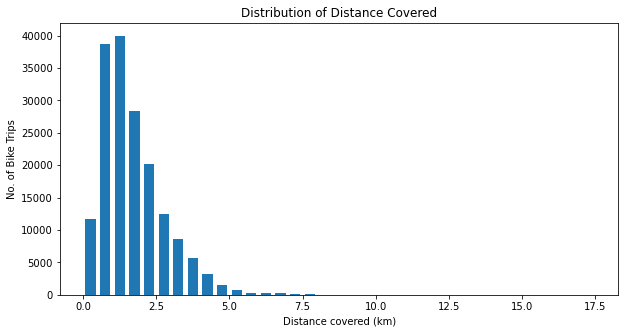

In [35]:
plt.figure(figsize=[10, 5])
bins_distance = np.arange(0, fordbike_clean.distance_km.max()+2, 0.5)
plt.hist(data = fordbike_clean, x = 'distance_km', bins = bins_distance, rwidth=0.7)
label_visual('Distance covered (km)', 'No. of Bike Trips', 'Distribution of Distance Covered')


The historam above show the distribution of distance covered (km). Majority of the distances covered ranged from 0.1 to 2.5 km. This demonstrates that the majority of trips were not long distances.

### Which gender has the most bike rides ?

In [36]:
#Which gender has the most bike rides ?¶
print("%3.1f"%(((fordbike_clean['member_gender'].value_counts()[0])/fordbike_clean['member_gender'].value_counts().sum())*100))
print("%3.1f"%(((fordbike_clean['member_gender'].value_counts()[1])/fordbike_clean['member_gender'].value_counts().sum())*100))
print("%3.1f"%(((fordbike_clean['member_gender'].value_counts()[2])/fordbike_clean['member_gender'].value_counts().sum())*100))

74.6
23.4
2.0


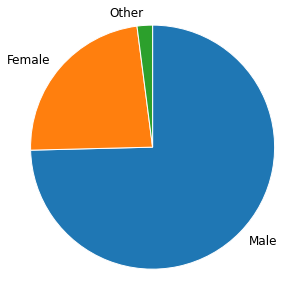

In [37]:
#pie plot of member_gender distribution
plt.figure(figsize=[10, 5])
sorted_counts = fordbike_clean['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops={'edgecolor': 'white'}, textprops={'size': 'large'});
plt.axis('square');

The plot shows that we have mostly Male riders constituting 75%,  Female riders 23% and others 2%

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
 

> Intially, after visual and programmatic assessement we made serious attempts to eliminate outliers in some columns such as `duration_sec` , `member_age` and a few other columns.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
 
> We limited most of the dataset to the values of 99% of the entire dataset. This was done to eliminate outliers in the dataset.

## Bivariate Exploration

> In this section, we shall investigate relationships between different pairs of variables in our dataset

### What is the relationship between gender and user type

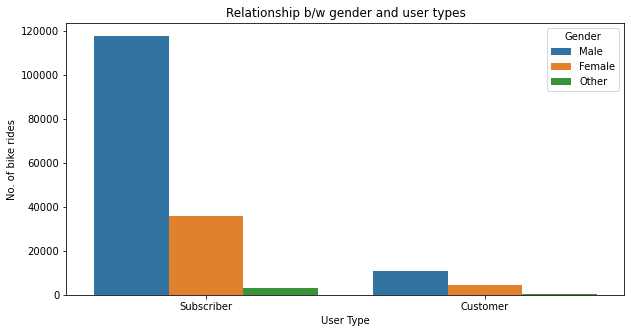

In [38]:
# We use a cluster bar chat to show the relationship btw to qualitative variables.
plt.figure(figsize=[10, 5])

sb.countplot(data =fordbike_clean, x = 'user_type', hue = 'member_gender')
legend = plt.legend([ "Male","Female", "Other"])
legend.set_title("Gender")

label_visual("User Type", "No. of bike rides", "Relationship b/w gender and user types")

The plot demonstrates that there are more male subscribers than male customers, while there are little or no `others` gender in customer users and a few male and female customers

### Which user type spends the most time riding ?

We shall look at the relationship between duration_sec (quantitative) and user_type(qualitative) using a Violin Plot. 

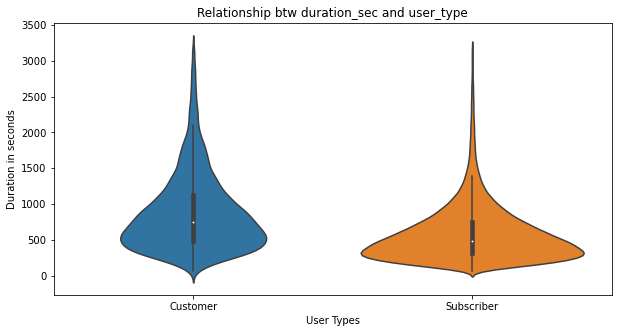

In [39]:
#Violent plot showing the relationship btw duration_sec and user_type
# set and create the figure size
plt.figure(figsize=[10, 5])
users = ["Customer", "Subscriber"]
sb.violinplot(data=fordbike_clean, x = "user_type", y="duration_sec", order=users)
label_visual("User Types","Duration in seconds", "Relationship btw duration_sec and user_type")


The figure demonstrates the relationship btw duration_sec and user_type. More Customers types send greater time between 500sec and 1000secs. While Subscriber users mostly spend an average of 500sec.  

### In which day of the Week do riders spends the most time.?

We shall look at the relationship between duration_sec (quantitative) and week`day` (qualitative) using a Bar Plot.

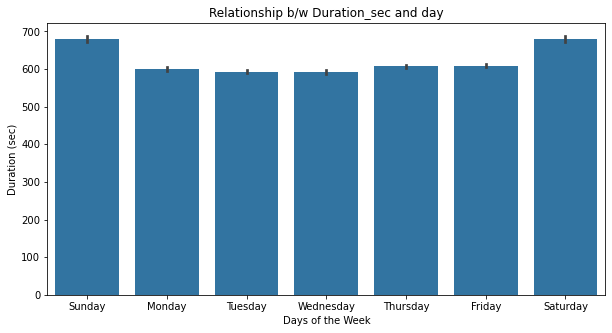

In [40]:
#relationship between duration_sec (quantitative) and weekday (qualitative) using a bar Plot.
plt.figure(figsize = [10, 5])
weekdays = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sb.barplot(data= fordbike_clean, x = "day", y="duration_sec" , order=weekdays, color=base_color)
label_visual("Days of the Week", "Duration (sec)", "Relationship b/w Duration_sec and day")


The graph show the relationship between duration_sec (quantitative) and week`day` (qualitative) using a Bar Plot. Riders spend more time riding on Sunday, Saturday than on workdays(Mon - Friday) 

### Which gender spends the most time riding bikes ?

Using a Box Plot we shall examine the distribution between trip duration(quantitative variable) and gender (qualitative variable) 
 

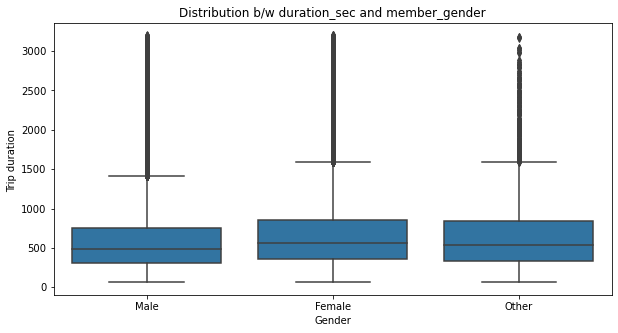

In [41]:
#Box plot showing distribution b/w duration_sec and member_gender
plt.figure(figsize = [10, 5])
sb.boxplot(data=fordbike_clean, x='member_gender', y= 'duration_sec', color=base_color)
label_visual('Gender', 'Trip duration ', 'Distribution b/w duration_sec and member_gender'  )

From the distribution, Females spent more time on their bikes than men on average.

### What is the relationship between distance covered and trip duration. ?

We use Seaborn's regplot() function that combines scatterplot creation with regression function fitting:

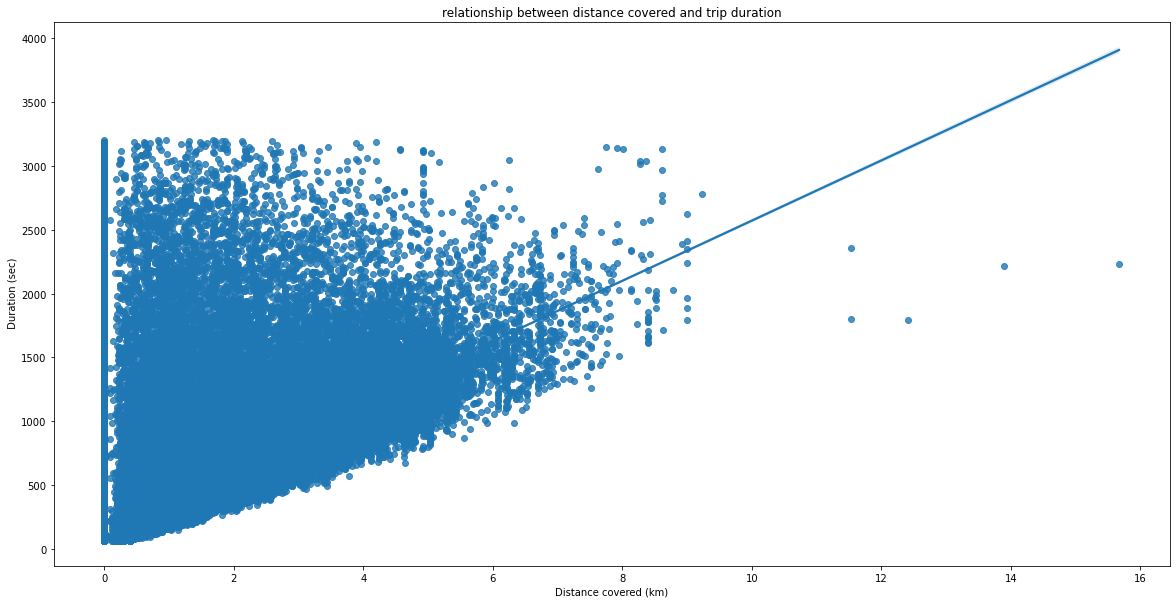

In [42]:
#the  relationship between distance covered and trip duration
plt.figure(figsize= [20, 10])
sb.regplot(data = fordbike_clean, x = 'distance_km', y='duration_sec')
label_visual('Distance covered (km)', ' Duration (sec)', 'relationship between distance covered and trip duration')



As expected, the regression line in the scatter plot shows  a positive correlation bwtween distance covered and duration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are more male subscribers than male customers, while there are little or no `others` gender in customer users and a few male and female customers. More Customers types send greater time between 500sec and 1000secs. While Subscriber users mostly spend an average of 500sec.  Riders spend more time riding on Sunday, Saturday than on workdays(Mon - Friday). As expected there is  a positive correlation bwtween distance covered and duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is intesting to know that Riders spend more time riding on Sunday, Saturday than on workdays(Mon - Friday)

## Multivariate Exploration

> In this section we shall investigate the relationship in more that 2 variables at once. 

### What is the relationship between  duration, distance and age ?

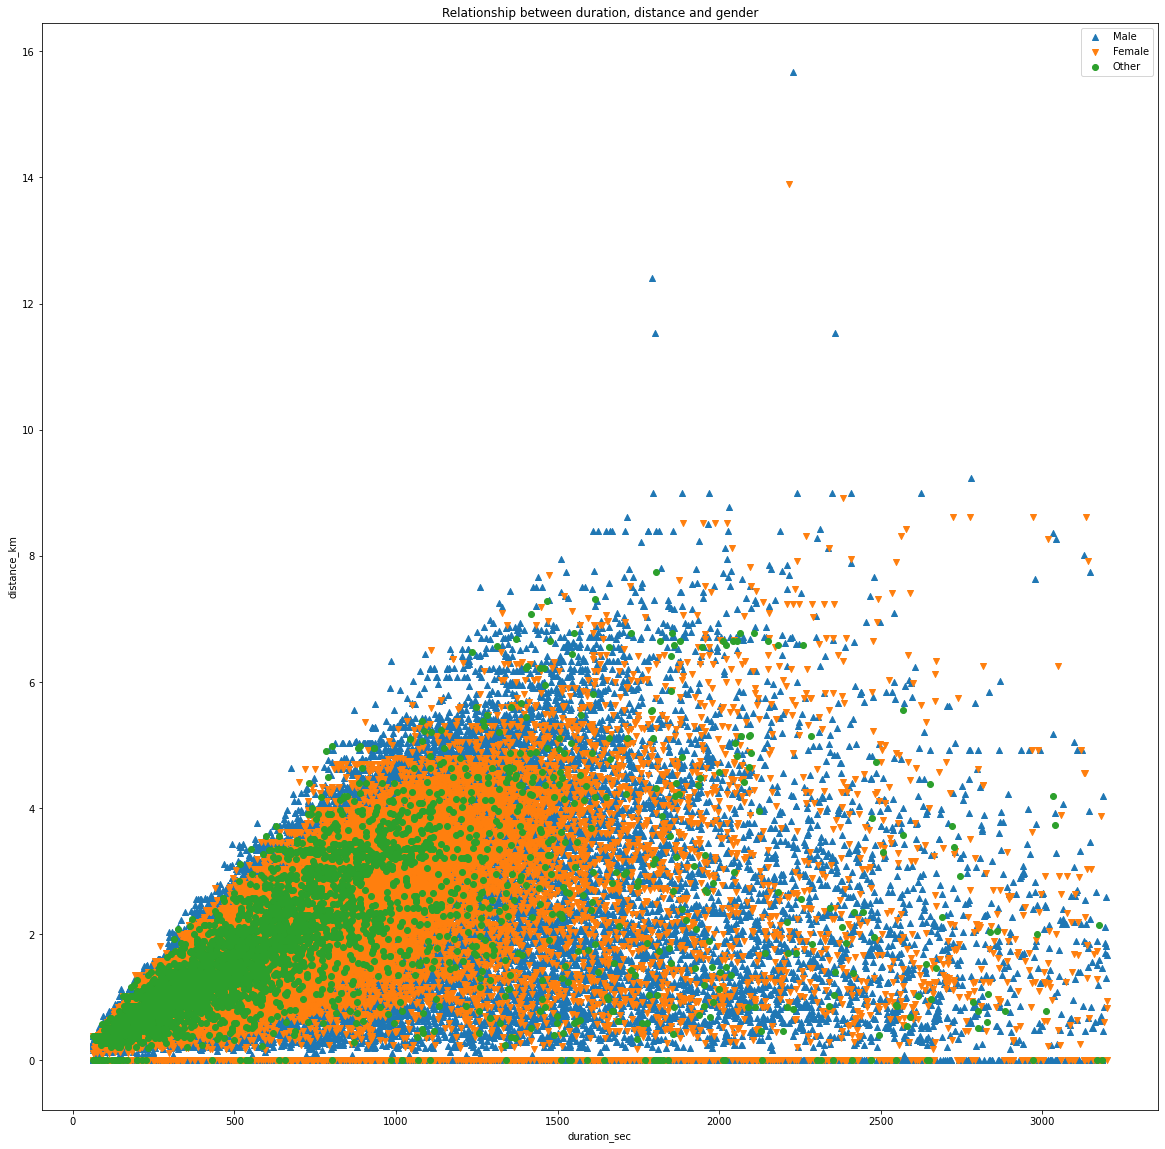

In [43]:
plt.figure(figsize= [20, 20])
cat_markers = [['Male', "^"],
               ['Female', "v"],
               ['Other', "o"]]

for cat, marker in cat_markers:
    df_cat = fordbike_clean[fordbike_clean['member_gender'] == cat]
    plt.scatter(data = df_cat, x = 'duration_sec', y = 'distance_km', marker = marker)
plt.legend(['Male','Female', 'Other'])
label_visual('duration_sec', 'distance_km', 'Relationship between duration, distance and gender')


The graph shows the relationship between duration, distance and gender. There are more males covering longer distances than females. There are more females spending more time riding bikes. 

### What is the do the average trip duration vary between user types on weekdays?

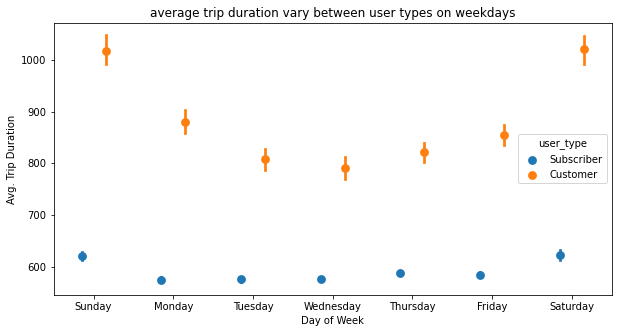

In [44]:
# Let look at the relationship between user_type, duration_sec and day. 
plt.figure(figsize= [10, 5])

sb.pointplot(data=fordbike_clean, x='day', y='duration_sec', 
             hue='user_type', dodge=0.3, linestyles="", order=weekdays);
label_visual('Day of Week', 'Avg. Trip Duration', 'average trip duration vary between user types on weekdays')

Generally more Customers spend more time riding bikes thatn subscribers. Both customers and subscribers spend more time on Sundays and Saturdays. There is not much preference  in workdays(Mon - Fri) for subscribers however, for customers most trip durtion occured on Monday

#### Finally let examine the Correlation matrices among all numberical variables

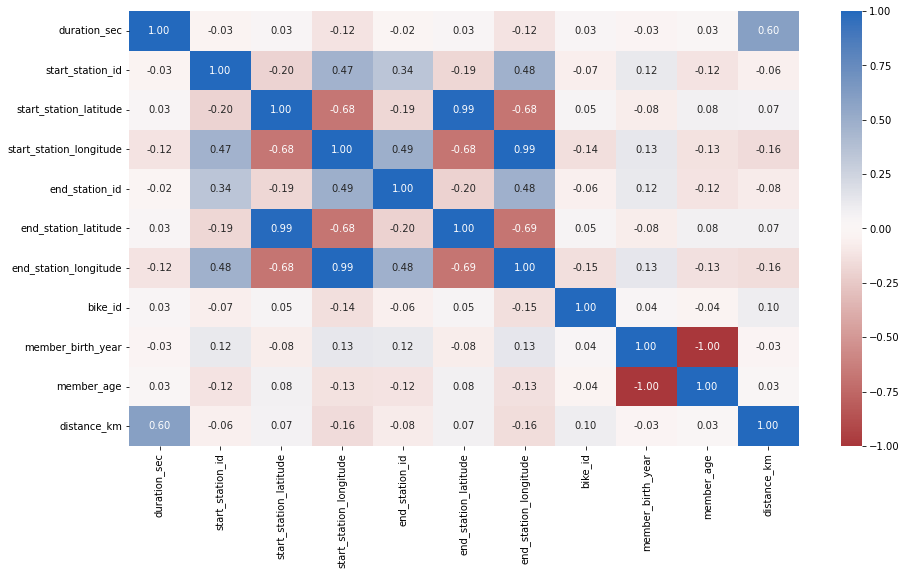

In [45]:
plt.figure(figsize=[15, 8])
sb.heatmap(fordbike_clean.corr(), annot= True, fmt='.2f',
          cmap = 'vlag_r', center = 0);

There is a strong relationship between duration in seconds and minutes and distance traveled in kilometers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Males are more likely to travel longer distances than females. Females are riding their bikes more frequently. Customers ride their bikes more than subscribers. On Sundays and Saturdays, both customers and subscribers spend more time. Subscribers have little preference for workdays (Mon-Fri), but customers have the most trip duration on Monday. The duration in seconds and minutes and the distance traveled in kilometers have a strong relationship.

### Were there any interesting or surprising interactions between features?

> Males are more likely to travel longer distances than females while females ride their bikes more frequently than males. 

## Conclusions
>In conclusion, bike riders tend to be between the ages of 25 and 40, who use their bikes the most frequently and ride for the longest periods of time during the workweek. The trend among riders is to travel exclusively by bicycle on Thursdays. Males are more likely to travel longer distances than females while females ride their bikes more frequently than males.

> A lot of effort was put into wrangling to ensure the best outcome of the analysis. 